In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

In [2]:
#tile_stats = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\IMS (1 km)\Outputs\tiles_IMS_ZonalSnowDynamics.csv", index_col = 0)
tile_stats = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\IMS (1 km)\Outputs\old\2024\tiles_IMS_ZonalSnowDynamics.csv", index_col = 0)
tile_stats

,smin_2018,smin_2019,smin_2020,smin_2021,smin_2022,smin_2023,smin_avg,smin_std,wyl_1819,wyl_1920,...,send_2223,send_avg,send_std,sper_1819,sper_1920,sper_2021,sper_2122,sper_2223,sper_avg,sper_std
0,217.0,215.0,198.0,218.0,220.0,205.0,212.166667,8.704405,363.0,348.0,...,45.0,67.000000,16.170962,1.0,1.0,3.0,1.0,1.0,1.4,0.894427
1,218.0,218.0,226.0,220.0,222.0,213.0,219.500000,4.370355,365.0,373.0,...,49.0,73.600000,16.364596,1.0,1.0,3.0,1.0,1.0,1.4,0.894427
2,216.0,217.0,204.0,214.0,215.0,204.0,211.666667,6.022181,366.0,352.0,...,43.0,66.400000,17.155174,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
3,211.0,205.0,183.0,194.0,202.0,183.0,196.333333,11.690452,359.0,343.0,...,NaN,69.333333,6.027714,1.0,0.0,1.0,1.0,0.0,0.6,0.547723
4,217.0,212.0,199.0,218.0,220.0,205.0,211.833333,8.280499,360.0,352.0,...,44.0,65.200000,15.205262,1.0,1.0,2.0,1.0,1.0,1.2,0.447214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,228.0,242.0,231.0,225.0,234.0,232.0,232.000000,5.830952,379.0,354.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
3387,228.0,217.0,231.0,225.0,234.0,232.0,227.833333,6.177918,354.0,379.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
3388,232.0,217.0,231.0,234.0,229.0,207.0,225.000000,10.677078,350.0,379.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
3389,234.0,246.0,209.0,227.0,229.0,237.0,230.333333,12.420413,377.0,328.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.000000


In [3]:
tiles = r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\UtilityData\Study Areas\Canada\TileSystems\60km\canadaFishnet_CanVec_60km_clip.shp"
tiles = gpd.read_file(tiles, engine = 'pyogrio').drop(columns = ['PERCENTAGE', 'Majority_Z'])
tiles['smin_2023'] = tile_stats['smin_2023']
tiles['smax_2223'] = tile_stats['smax_2223']
tiles['sstart_2223'] = tile_stats['sstart_2223']
tiles['send_2223'] = tile_stats['send_2223']
tiles['status_2223'] = tile_stats['status_2223']
tiles

,geometry,smin_2023,smax_2223,sstart_2223,send_2223,status_2223
0,"POLYGON ((1008972.823 -693717.864, 1007578.707...",205.0,22.0,-1.0,45.0,0
1,"POLYGON ((1055101.994 -724723.511, 1018145.335...",213.0,32.0,-7.0,49.0,0
2,"POLYGON ((1068972.823 -721970.695, 1068972.823...",204.0,6.0,-7.0,43.0,0
3,"POLYGON ((1128972.823 -672417.924, 1128972.823...",183.0,10.0,NaN,NaN,3
4,"POLYGON ((1006314.847 -664723.511, 1006713.578...",205.0,21.0,-1.0,44.0,0
...,...,...,...,...,...,...
3386,"POLYGON ((288972.823 3775276.489, 288972.823 3...",232.0,43.0,NaN,NaN,1
3387,"POLYGON ((348972.823 3775276.489, 348972.823 3...",232.0,41.0,NaN,NaN,1
3388,"POLYGON ((408972.823 3775276.489, 408972.823 3...",207.0,45.0,NaN,NaN,1
3389,"POLYGON ((468972.823 3775276.489, 468972.823 3...",237.0,41.0,NaN,NaN,1


# smin_2023

In [4]:
#tiles['smin_2023'].hist()

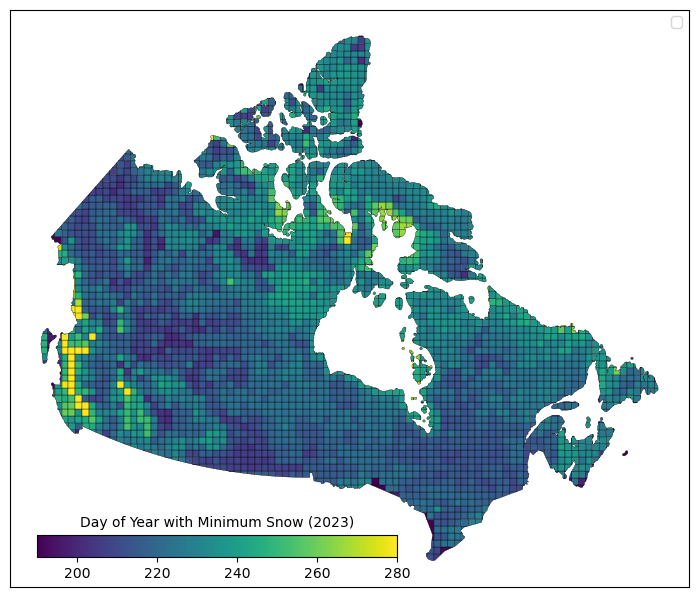

In [5]:
#fig, axs = plt.subplots(2, 2, figsize = (10, 7.5))
vutil.mapCanada(tiles, form = 'vector', var = 'smin_2023', label = 'Day of Year with Minimum Snow (2023)', range = [190, 280], single_plot = True)

# smax_2223

In [6]:
#tiles['smax_2223'].hist()

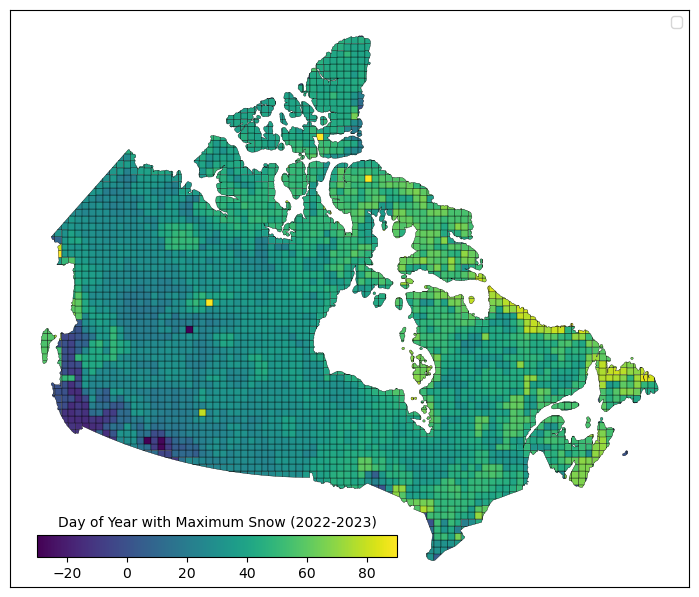

In [7]:
vutil.mapCanada(tiles, form = 'vector', var = 'smax_2223', label = 'Day of Year with Maximum Snow (2022-2023)', range = [-30, 90], single_plot = True)

# sstart_2223

In [8]:
#tiles['sstart_2223'].hist()

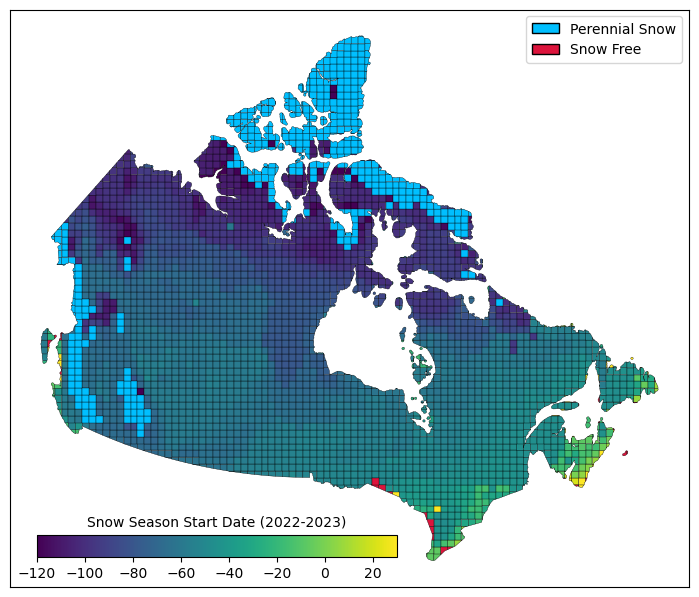

In [9]:
vutil.mapCanada(tiles, form = 'vector', var = 'sstart_2223', label = 'Snow Season Start Date (2022-2023)', range = [-120, 30], 
                       vcon1 = tiles[(tiles['status_2223'] >= 1) & (tiles['status_2223'] <= 2)], con1_col = 'deepskyblue', con1_lab = 'Perennial Snow',
                       vcon2 = tiles[(tiles['status_2223'] == 3)], con2_col = 'crimson', con2_lab = 'Snow Free', single_plot = True)

# send_2223

In [10]:
#tiles['send_2223'].hist()

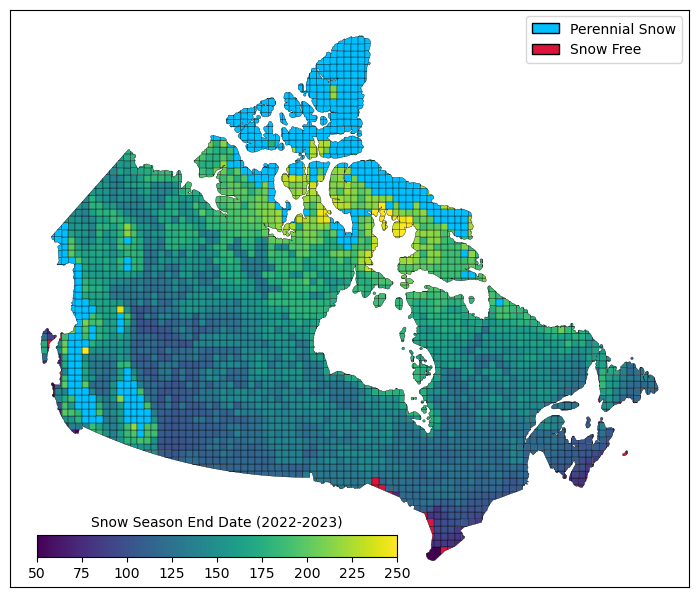

In [11]:
vutil.mapCanada(tiles, form = 'vector', var = 'send_2223', label = 'Snow Season End Date (2022-2023)', range = [50, 250], 
                       vcon1 = tiles[(tiles['status_2223'] >= 1) & (tiles['status_2223'] <= 2)], con1_col = 'deepskyblue', con1_lab = 'Perennial Snow',
                       vcon2 = tiles[(tiles['status_2223'] == 3)], con2_col = 'crimson', con2_lab = 'Snow Free', single_plot = True)

# 2x2 Plot

C:\Users\mbonney\AppData\Local\Temp\ipykernel_24444\137310386.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad = 0, w_pad = -4.4)


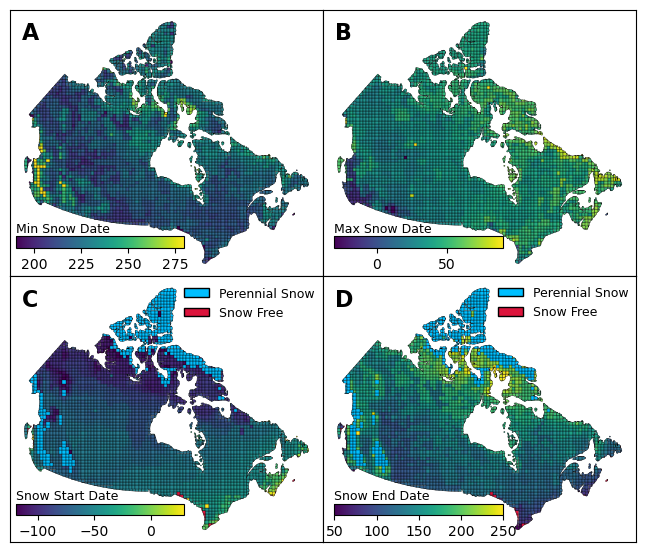

In [46]:
fig, axs = plt.subplots(2, 2, figsize = (7.5, 7.5 * 0.75)) # 3876 pixel width

cmap = 'viridis'

# A
axs[0, 0].text(-2400000, 3500000, 'A', fontsize = 16, weight = 'bold')

label = 'Min Snow Date'
range = [190, 280]

vutil.mapCanada(tiles, ax = axs[0, 0], form = 'vector', var = 'smin_2023', label = label, range = range, single_plot = False)

cbax = fig.add_axes([0.09, 0.55, 0.225, 0.02]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel(label, labelpad = -35, loc = 'left', size = 9)

# B
axs[0, 1].text(-2400000, 3500000, 'B', fontsize = 16, weight = 'bold')

label = 'Max Snow Date'
range = [-30, 90]

vutil.mapCanada(tiles, ax = axs[0, 1], form = 'vector', var = 'smax_2223', label = label, range = range, single_plot = False)

cbax = fig.add_axes([0.515, 0.55, 0.225, 0.02]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel(label, labelpad = -35, loc = 'left', size = 9)

# C
axs[1, 0].text(-2400000, 3500000, 'C', fontsize = 16, weight = 'bold')

label = 'Snow Start Date'
range = [-120, 30]

vutil.mapCanada(tiles, ax = axs[1, 0], form = 'vector', var = 'sstart_2223', label = label, range = range, 
                vcon1 = tiles[(tiles['status_2223'] >= 1) & (tiles['status_2223'] <= 2)], con1_col = 'deepskyblue', con1_lab = 'Perennial Snow',
                vcon2 = tiles[(tiles['status_2223'] == 3)], con2_col = 'crimson', con2_lab = 'Snow Free', single_plot = False)

handles = []
con1_patch = mpatches.Patch(facecolor = 'deepskyblue', edgecolor = 'black', label = 'Perennial Snow')
handles.append(con1_patch)
con2_patch = mpatches.Patch(facecolor = 'crimson', edgecolor = 'black', label = 'Snow Free')
handles.append(con2_patch)
plt.legend(handles = handles, loc = 'upper right', bbox_to_anchor = (-0.05, -2.5), fontsize = 9, frameon = False)

cbax = fig.add_axes([0.09, 0.075, 0.225, 0.02]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel(label, labelpad = -35, loc = 'left', size = 9)

# D
axs[1, 1].text(-2400000, 3500000, 'D', fontsize = 16, weight = 'bold')

label = 'Snow End Date'
range = [50, 250]

vutil.mapCanada(tiles, ax = axs[1, 1], form = 'vector', var = 'send_2223', label = label, range = range, 
                vcon1 = tiles[(tiles['status_2223'] >= 1) & (tiles['status_2223'] <= 2)], con1_col = 'deepskyblue', con1_lab = 'Perennial Snow',
                vcon2 = tiles[(tiles['status_2223'] == 3)], con2_col = 'crimson', con2_lab = 'Snow Free', single_plot = False)

handles = []
con1_patch = mpatches.Patch(facecolor = 'deepskyblue', edgecolor = 'black', label = 'Perennial Snow')
handles.append(con1_patch)
con2_patch = mpatches.Patch(facecolor = 'crimson', edgecolor = 'black', label = 'Snow Free')
handles.append(con2_patch)
plt.legend(handles = handles, loc = 'upper right', bbox_to_anchor = (3.7, 21.3), fontsize = 9, frameon = False)

cbax = fig.add_axes([0.515, 0.075, 0.225, 0.02]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel(label, labelpad = -35, loc = 'left', size = 9)

plt.tight_layout(h_pad = 0, w_pad = -4.4)

plt.show()

#fig.get_figure().savefig('Figure S10_1.tif', dpi = 600, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'})

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize = (10 * 2, 7.5 * 2))

# cmap = 'viridis'

# # A
# axs[0, 0].text(-2300000, 3500000, 'A', fontsize = 32, weight = 'bold')

# label = 'Day of Year with Minimum Snow (2023)'
# range = [190, 280]

# vutil.mapCanada(tiles, ax = axs[0, 0], form = 'vector', var = 'smin_2023', label = label, range = range, single_plot = False)

# cbax = fig.add_axes([0.085, 0.54, 0.225, 0.02]) # Left, Bottom, Width, Height
# sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
# fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
# cbax.set_xlabel(label, labelpad = -57, size = 12)

# # B
# axs[0, 1].text(-2300000, 3500000, 'B', fontsize = 32, weight = 'bold')

# label = 'Day of Year with Maximum Snow (2022-2023)'
# range = [-30, 90]

# vutil.mapCanada(tiles, ax = axs[0, 1], form = 'vector', var = 'smax_2223', label = label, range = range, single_plot = False)

# cbax = fig.add_axes([0.52, 0.54, 0.225, 0.02]) # Left, Bottom, Width, Height
# sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
# fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
# cbax.set_xlabel(label, labelpad = -57, size = 12)

# # C
# axs[1, 0].text(-2300000, 3500000, 'C', fontsize = 32, weight = 'bold')

# label = 'Snow Season Start Date (2022-2023)'
# range = [-120, 30]

# vutil.mapCanada(tiles, ax = axs[1, 0], form = 'vector', var = 'sstart_2223', label = label, range = range, 
#                 vcon1 = tiles[(tiles['status_2223'] >= 1) & (tiles['status_2223'] <= 2)], con1_col = 'deepskyblue', con1_lab = 'Perennial Snow',
#                 vcon2 = tiles[(tiles['status_2223'] == 3)], con2_col = 'crimson', con2_lab = 'Snow Free', single_plot = False)

# handles = []
# con1_patch = mpatches.Patch(facecolor = 'deepskyblue', edgecolor = 'black', label = 'Perennial Snow')
# handles.append(con1_patch)
# con2_patch = mpatches.Patch(facecolor = 'crimson', edgecolor = 'black', label = 'Snow Free')
# handles.append(con2_patch)
# plt.legend(handles = handles, loc = 'upper right', bbox_to_anchor = (-0.125, -2.6), fontsize = 12)

# cbax = fig.add_axes([0.085, 0.045, 0.225, 0.02]) # Left, Bottom, Width, Height
# sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
# fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
# cbax.set_xlabel(label, labelpad = -57, size = 12)

# # D
# axs[1, 1].text(-2300000, 3500000, 'D', fontsize = 32, weight = 'bold')

# label = 'Snow Season End Date (2022-2023)'
# range = [50, 250]

# vutil.mapCanada(tiles, ax = axs[1, 1], form = 'vector', var = 'send_2223', label = label, range = range, 
#                 vcon1 = tiles[(tiles['status_2223'] >= 1) & (tiles['status_2223'] <= 2)], con1_col = 'deepskyblue', con1_lab = 'Perennial Snow',
#                 vcon2 = tiles[(tiles['status_2223'] == 3)], con2_col = 'crimson', con2_lab = 'Snow Free', single_plot = False)

# handles = []
# con1_patch = mpatches.Patch(facecolor = 'deepskyblue', edgecolor = 'black', label = 'Perennial Snow')
# handles.append(con1_patch)
# con2_patch = mpatches.Patch(facecolor = 'crimson', edgecolor = 'black', label = 'Snow Free')
# handles.append(con2_patch)
# plt.legend(handles = handles, loc = 'upper right', bbox_to_anchor = (3.74, 22.2), fontsize = 12)

# cbax = fig.add_axes([0.52, 0.045, 0.225, 0.02]) # Left, Bottom, Width, Height
# sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
# fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
# cbax.set_xlabel(label, labelpad = -57, size = 12)

# plt.tight_layout(w_pad = -10.5)

# plt.show()

# fig.get_figure().savefig('Figure S10.tif', dpi = 300, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'}) # 600 dpi recommended. But file big. 